## Make multiclass Dataset and Classification using NCM (Euclidean)

Sklearn datasets의 make_classification를 통해 데이터 생성

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


(15000, 4) (15000,)


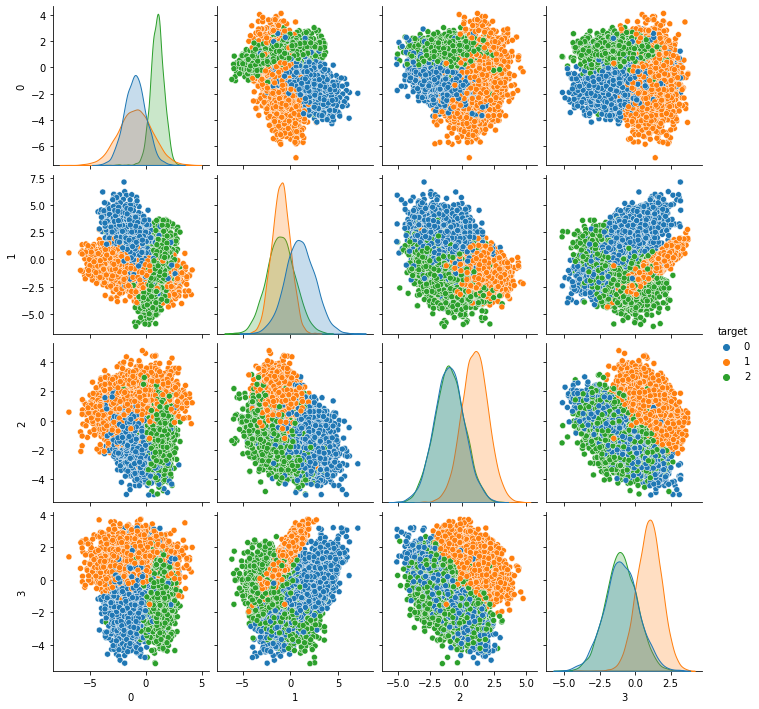

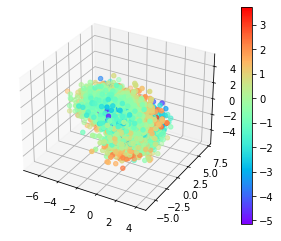

In [2]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

print(features.shape, target.shape)

feature_names = ["0", "1", "2", "3"]
df_feature = pd.DataFrame(features, columns=feature_names)
df_target = pd.DataFrame(target, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[:, 0]
y = features[:, 1]
z = features[:, 2]
c = features[:, 3]

img = ax.scatter(x, y, z, c=c, cmap=plt.cm.rainbow)
fig.colorbar(img)
plt.show()

## Nearest Class Mean

In [3]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    nc = NearestCentroid()
    nc.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = nc.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

train size :  12000  / test size :  3000
----------------------------------------
Test set score: 0.890667
Training Time : 0.0004 sec
